<a href="https://colab.research.google.com/github/Lucky456F/Tamizan-Skills-Internship-ML-AI/blob/AIMI/Project_1_Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('emails.csv')  # Replace with your dataset path


In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

# %%
df = pd.read_csv('emails.csv')  # Replace with your dataset path

# %%
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join back to string
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Assuming the correct column name for the label is 'spam', replace 'label' with the actual column name
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['spam'], test_size=0.2, random_state=42, stratify=df['spam']
)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)


In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)


In [ ]:
def evaluate(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    # Change pos_label from 'spam' to 1 (assuming 1 represents spam)
    print("Precision:", precision_score(y_true, y_pred, pos_label=1))
    # Change pos_label from 'spam' to 1 (assuming 1 represents spam)
    print("Recall:", recall_score(y_true, y_pred, pos_label=1))
    print()

evaluate(y_test, y_pred_nb, "Naive Bayes")
evaluate(y_test, y_pred_svm, "SVM")

Results for Naive Bayes:
Accuracy: 0.8979057591623036
Precision: 1.0
Recall: 0.572992700729927

Results for SVM:
Accuracy: 0.993891797556719
Precision: 0.9854545454545455
Recall: 0.9890510948905109



In [ ]:
import joblib

joblib.dump(nb_model, 'spam_nb_model.pkl')
joblib.dump(svm_model, 'spam_svm_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
def predict_spam(email_text, model, vectorizer):
    processed = preprocess(email_text)
    vec = vectorizer.transform([processed])
    return model.predict(vec)[0]

# Example usage:
# result = predict_spam("Congratulations! You've won a prize.", nb_model, vectorizer)
# print("Spam" if result == 'spam' else "Ham")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# For binary label conversion if labels are 'spam'/'ham'
from sklearn.preprocessing import LabelBinarizer


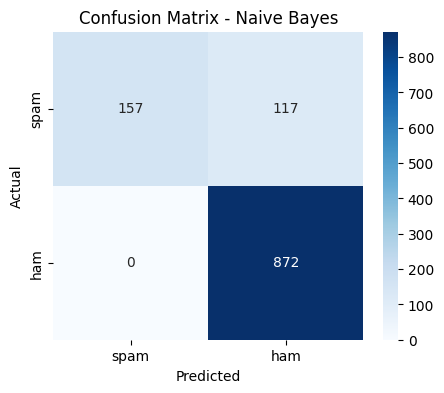

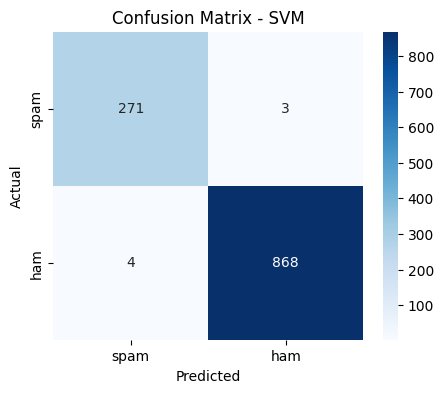

In [ ]:
def plot_confusion(y_true, y_pred, model_name):
    # Convert numerical labels (0, 1) to string labels ('ham', 'spam')
    y_true_str = ['spam' if label == 1 else 'ham' for label in y_true]
    y_pred_str = ['spam' if label == 1 else 'ham' for label in y_pred]

    # Now use the string labels in confusion_matrix
    cm = confusion_matrix(y_true_str, y_pred_str, labels=['spam', 'ham'])

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['spam', 'ham'], yticklabels=['spam', 'ham'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Example usage:
plot_confusion(y_test, y_pred_nb, "Naive Bayes")
plot_confusion(y_test, y_pred_svm, "SVM")

In [ ]:
def print_classification_report(y_true, y_pred, model_name):
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=['spam', 'ham']))

# Example usage:
print_classification_report(y_test, y_pred_nb, "Naive Bayes")
print_classification_report(y_test, y_pred_svm, "SVM")


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

        spam       0.88      1.00      0.94       872
         ham       1.00      0.57      0.73       274

    accuracy                           0.90      1146
   macro avg       0.94      0.79      0.83      1146
weighted avg       0.91      0.90      0.89      1146

Classification Report for SVM:
              precision    recall  f1-score   support

        spam       1.00      1.00      1.00       872
         ham       0.99      0.99      0.99       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



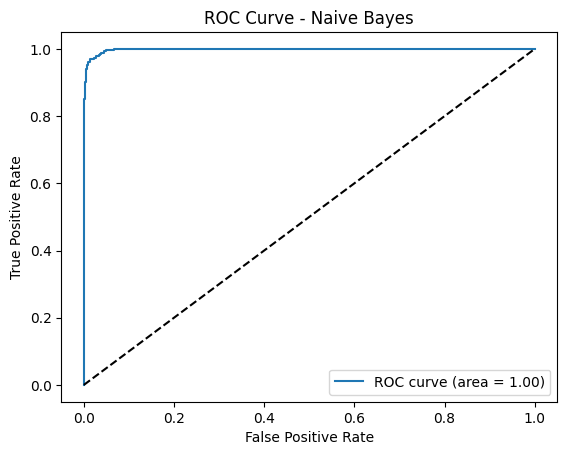

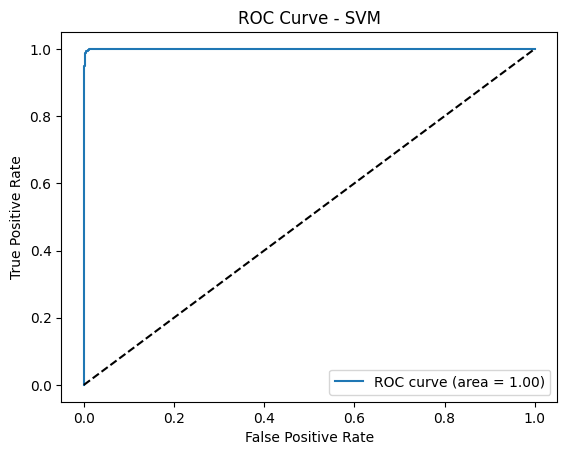

In [ ]:
def plot_roc_curve(y_true, y_scores, model_name):
    # Convert labels to binary
    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_true).ravel()  # 1 for spam, 0 for ham
    fpr, tpr, thresholds = roc_curve(y_true_bin, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# For Naive Bayes
y_scores_nb = nb_model.predict_proba(X_test_vec)[:, 1]  # Probability for 'spam'
plot_roc_curve(y_test, y_scores_nb, "Naive Bayes")

# For SVM (decision_function, higher means more likely 'spam')
y_scores_svm = svm_model.decision_function(X_test_vec)
plot_roc_curve(y_test, y_scores_svm, "SVM")


In [ ]:
import numpy as np

def show_top_features(vectorizer, model, n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    top_spam = np.argsort(model.feature_log_prob_[1])[-n:]  # Index 1 for 'spam'
    top_ham = np.argsort(model.feature_log_prob_[0])[-n:]   # Index 0 for 'ham'
    print("Top spam features:", feature_names[top_spam][::-1])
    print("Top ham features:", feature_names[top_ham][::-1])

show_top_features(vectorizer, nb_model)


Top spam features: ['software' 'subject' 'website' 'click' 'business' 'money' 'com' 'http'
 'save' 'email']
Top ham features: ['ect' 'enron' 'vince' 'subject' 'hou' 'kaminski' '2000' 'please' 'would'
 'com']


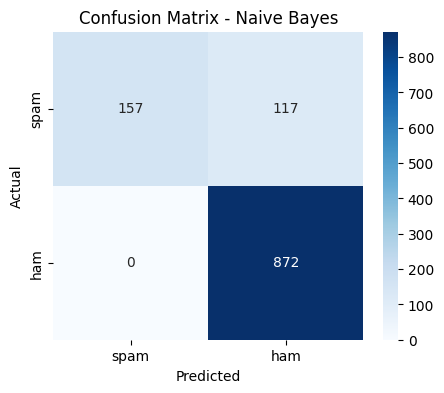

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

        spam       0.88      1.00      0.94       872
         ham       1.00      0.57      0.73       274

    accuracy                           0.90      1146
   macro avg       0.94      0.79      0.83      1146
weighted avg       0.91      0.90      0.89      1146



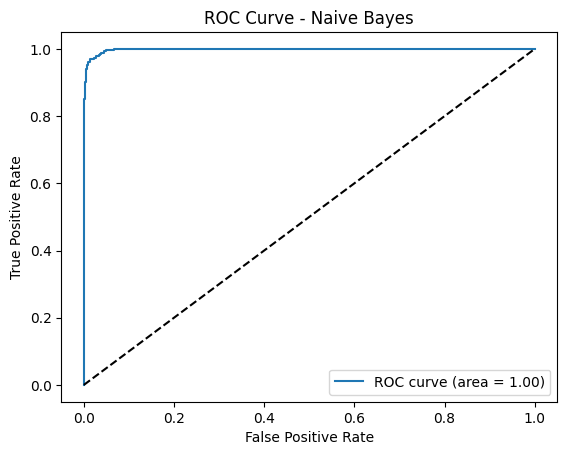

Top spam features: ['software' 'subject' 'website' 'click' 'business' 'money' 'com' 'http'
 'save' 'email']
Top ham features: ['ect' 'enron' 'vince' 'subject' 'hou' 'kaminski' '2000' 'please' 'would'
 'com']


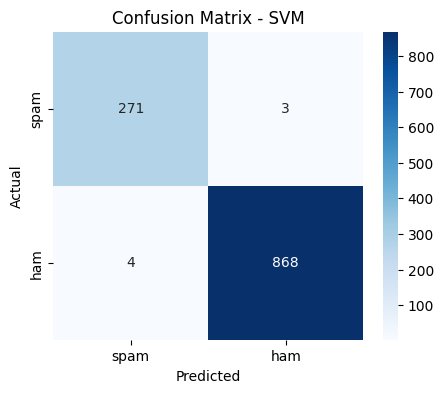

Classification Report for SVM:
              precision    recall  f1-score   support

        spam       1.00      1.00      1.00       872
         ham       0.99      0.99      0.99       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



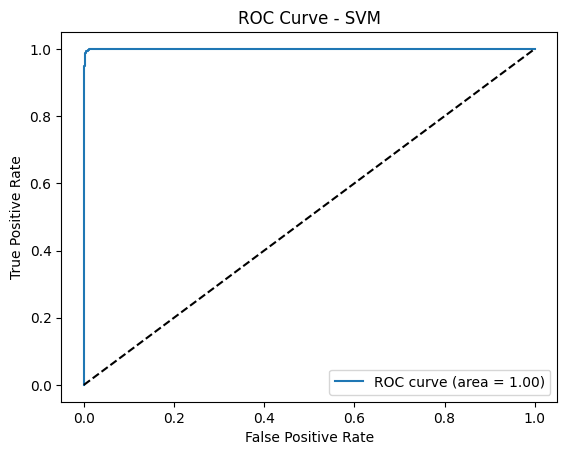

In [ ]:
# Run all analysis for Naive Bayes
plot_confusion(y_test, y_pred_nb, "Naive Bayes")
print_classification_report(y_test, y_pred_nb, "Naive Bayes")
plot_roc_curve(y_test, y_scores_nb, "Naive Bayes")
show_top_features(vectorizer, nb_model)

# Run all analysis for SVM
plot_confusion(y_test, y_pred_svm, "SVM")
print_classification_report(y_test, y_pred_svm, "SVM")
plot_roc_curve(y_test, y_scores_svm, "SVM")
